In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
Path.BASE_PATH  =path
path.ls()

(#2) [Path('images'),Path('annotations')]

In [4]:
(path/"images").ls()

(#7393) [Path('images/beagle_115.jpg'),Path('images/boxer_18.jpg'),Path('images/Maine_Coon_157.jpg'),Path('images/scottish_terrier_28.jpg'),Path('images/english_setter_6.jpg'),Path('images/american_pit_bull_terrier_79.jpg'),Path('images/boxer_128.jpg'),Path('images/Persian_265.jpg'),Path('images/Maine_Coon_182.jpg'),Path('images/keeshond_89.jpg')...]

In [6]:
fname = (path/"images").ls()[0]
fname

Path('images/beagle_115.jpg')

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['beagle']

In [9]:
pets = DataBlock(blocks=(ImageBlock,CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(),
                get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
                item_tfms=Resize(460),
                batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls = pets.dataloaders(path/"images")

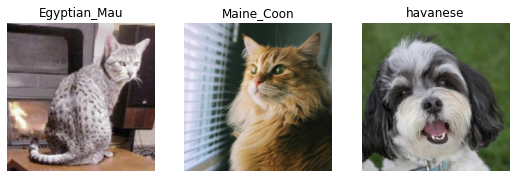

In [10]:
dls.show_batch(nrows=1,ncols=3)

In [11]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.949699,0.310417,0.905954,01:24


epoch,train_loss,valid_loss,accuracy,time
0,0.446683,0.343957,0.895129,01:26
1,0.265802,0.231615,0.930311,01:27


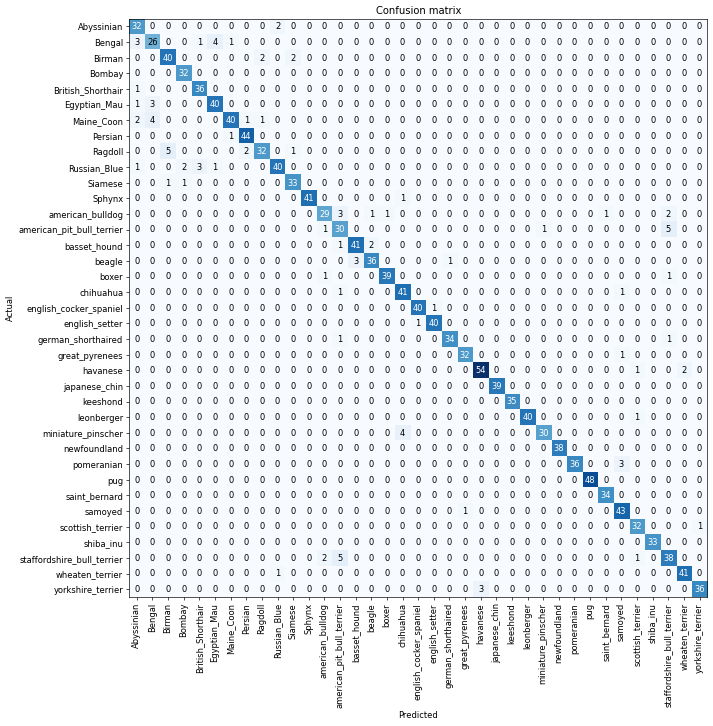

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [13]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

SuggestedLRs(lr_min=0.006918309628963471, lr_steep=0.002511886414140463)

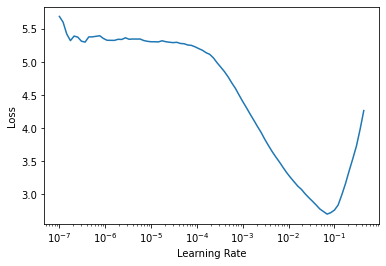

In [14]:
learn = cnn_learner(dls,resnet50,metrics=accuracy)
learn.lr_find()

In [17]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fit_one_cycle(3, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.038743,0.343187,0.894452,01:21
1,0.446137,0.236138,0.927605,01:21
2,0.270570,0.209161,0.939784,01:20


In [18]:
learn.unfreeze()

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

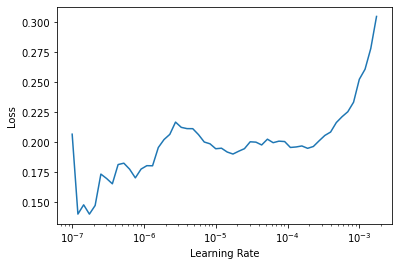

In [20]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(8, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()
learn.fine_tune(6, freeze_epochs=3)